# Sequential neural network

## Breast cancer dataset

For details on the dataset see [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np

# Load dataset
data = load_breast_cancer()

# A bit of exploration
print(data.data.shape)
print(data.feature_names)
print(data.target_names)

# This is the verbose description
#print(data.DESCR)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [2]:
# Separating features and target
X, y = data.data, data.target

# Taking a look
print(X.shape)
print(y.shape)
print(y)

(569, 30)
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1

## Define the network, train

In [13]:
# We are building a "sequential" model, meaning that the data will
# flow like INPUT -> ELABORATION -> OUTPUT.
from keras.models import Sequential

# A "dense" layer is a layer were all the data coming in are connected
# to all nodes.
from keras.layers import Dense, Input

# Binary classification shallow neural network model in Keras
model = Sequential()
model.add(Input(shape = (30,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# The model is declared, but we still need to compile it to actually
# build all the data structures
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
h = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5462 - loss: 817.8356 - val_accuracy: 0.7719 - val_loss: 0.6900
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5934 - loss: 0.6918 - val_accuracy: 0.7719 - val_loss: 0.6872
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5819 - loss: 0.6912 - val_accuracy: 0.7719 - val_loss: 0.6836
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5875 - loss: 0.6900 - val_accuracy: 0.7719 - val_loss: 0.6801
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6131 - loss: 0.6877 - val_accuracy: 0.7719 - val_loss: 0.6772
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6158 - loss: 0.6864 - val_accuracy: 0.7719 - val_loss: 0.6744
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5684 - loss: 0.6888 - val_accuracy: 0.7719 - val_loss: 0.6717
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5838 - loss: 0.6870 - val_accuracy: 0.7719 - val_l

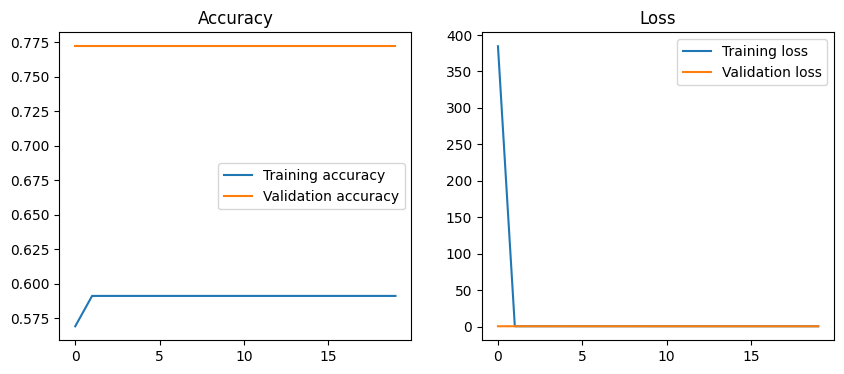

In [16]:
# Plotting loss and accuracy

import matplotlib.pyplot as plt

# preparing subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

#the first subplot
ax1.plot(h.history['accuracy'], label='Training accuracy')
ax1.plot(h.history['val_accuracy'], label='Validation accuracy')

# the second subplot
ax2.plot(h.history['loss'], label='Training loss')
ax2.plot(h.history['val_loss'], label='Validation loss')

# adding titles
ax1.set_title('Accuracy')
ax2.set_title('Loss')

# adding legends
ax1.legend()
ax2.legend()

# Showing the plot
plt.show()

# Exercise

* what happens if you keep training?
* modify the network architecture, change the number of layers, nodes
* normalize the data, does it make any difference?
  * TIP look here https://datagy.io/pandas-normalize-column/

# Recurrent Neural Network

## Simulated longitudinal data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Simulate longitudinal data
n_samples = 1000
timesteps = 12
features = 10

# Random sequences with a bit of signal
X = np.random.rand(n_samples, timesteps, features)
y = (X[:, -1, 0] > 0.5).astype(int)  # outcome loosely based on final timepoint feature

# Train/val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Define and train the network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking, Input
from tensorflow.keras.optimizers import Adam

# Build model
model = Sequential([
    Input(shape=(timesteps, features)),
    Masking(mask_value=0.0),  # handles padded sequences
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

## Evaluate the performances

In [ ]:
# On training set
loss, acc = model.evaluate(X_train, y_train)
print(f"Accuracy on training set: {acc:.2f}")

# On validation set
loss, acc = model.evaluate(X_val, y_val)
print(f"Accuracy on validation set: {acc:.2f}")